In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv(r"datasets_557629_1378005_covid_19_india.csv",  sep="\t")

In [3]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.shape

(4601, 9)

In [5]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,4601.000000,4601.000000,4601.000000,4601.000000
mean,2301.000000,5171.104542,241.599435,8889.588133
std,1328.338624,17536.818646,1019.099314,29179.653286
min,1.000000,0.000000,0.000000,0.000000
25%,1151.000000,6.000000,0.000000,37.000000
50%,2301.000000,145.000000,4.000000,523.000000
75%,3451.000000,2209.000000,54.000000,4549.000000
max,4601.000000,221944.000000,13883.000000,383723.000000


In [6]:
data.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
data.shape

(4601, 9)

In [8]:
data[data.duplicated()].sum()

Sno                         0.0
Date                        0.0
Time                        0.0
State/UnionTerritory        0.0
ConfirmedIndianNational     0.0
ConfirmedForeignNational    0.0
Cured                       0.0
Deaths                      0.0
Confirmed                   0.0
dtype: float64

In [9]:
data.drop(['Sno'], axis=1, inplace=True)

In [10]:
data.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [11]:
data.rename(columns={"State/UnionTerritory":"State"}, inplace=True)

In [12]:
data.head()

,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [13]:
data.columns.tolist()

['Date',
 'Time',
 'State',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      4601 non-null   object
 1   Time                      4601 non-null   object
 2   State                     4601 non-null   object
 3   ConfirmedIndianNational   4601 non-null   object
 4   ConfirmedForeignNational  4601 non-null   object
 5   Cured                     4601 non-null   int64 
 6   Deaths                    4601 non-null   int64 
 7   Confirmed                 4601 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 287.7+ KB


In [15]:
data.drop(['Time'], inplace=True, axis=1)

In [16]:
data.head()

,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,1,0,0,0,1
1,31-01-2020,Kerala,1,0,0,0,1
2,01-02-2020,Kerala,2,0,0,0,2
3,02-02-2020,Kerala,3,0,0,0,3
4,03-02-2020,Kerala,3,0,0,0,3


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      4601 non-null   object
 1   State                     4601 non-null   object
 2   ConfirmedIndianNational   4601 non-null   object
 3   ConfirmedForeignNational  4601 non-null   object
 4   Cured                     4601 non-null   int64 
 5   Deaths                    4601 non-null   int64 
 6   Confirmed                 4601 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 251.7+ KB


In [18]:
data["Confirmed"].sum()

40900995

In [19]:
column_list_name = data.columns.tolist()
column_list_name

['Date',
 'State',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [99]:
### group by dates
# temp = data.groupby(by=['Date'])
# data1 = temp[['Cured', 'Deaths',"Confirmed"]].sum().reset_index()
data1 = data1.groupby(by=['Date']).agg({'Cured':"sum", 'Deaths':'sum',"Confirmed":'sum'}).reset_index()
data1['Date'] = pd.to_datetime(data1['Date'], format="%d-%m-%Y")
data1['Month'] = data1['Date'].dt.month
data1['Days_since'] = data1['Date']-data1['Date'][0]
data1.tail()


,Date,Cured,Deaths,Confirmed,Month,Days_since
176,2020-07-24,817209,30601,1287945,7,176 days
177,2020-07-25,849432,31358,1336861,7,177 days
178,2020-07-26,885577,32063,1385522,7,178 days
179,2020-07-27,917568,32771,1435453,7,179 days
180,2020-07-28,952743,33425,1483156,7,180 days


In [78]:
data1['Active_cases'] = data1['Confirmed']-data1['Deaths']-data1['Cured']
data1['Death_ratio'] = (data1['Deaths']/data1['Confirmed'])*100
data1['cured_ratio'] = (data1['Cured']/data1['Confirmed'])*100
data1.head()

,Date,Cured,Deaths,Confirmed,Month,Days_since,Active_cases,Death_ratio,cured_ratio
0,2020-01-30,0,0,1,1,0 days,1,0.0,0.0
1,2020-01-31,0,0,1,1,1 days,1,0.0,0.0
2,2020-02-01,0,0,2,2,2 days,2,0.0,0.0
3,2020-02-02,0,0,3,2,3 days,3,0.0,0.0
4,2020-02-03,0,0,3,2,4 days,3,0.0,0.0


In [79]:
print("Number of Confirmed Cases",data1["Confirmed"].iloc[-1])
print("Number of Recovered Cases",data1["Cured"].iloc[-1])
print("Number of Death Cases",data1["Deaths"].iloc[-1])
print("Number of Active Cases",data1["Active_cases"].iloc[-1])
print("Number of Closed Cases",data1["Cured"].iloc[-1]+data1["Deaths"].iloc[-1])

Number of Confirmed Cases 1483156
Number of Recovered Cases 952743
Number of Death Cases 33425
Number of Active Cases 496988
Number of Closed Cases 986168


In [80]:
fig = px.bar(x = data1['Date'], y = data1['Confirmed'])
fig.update_layout(title = "Confirmed cases", xaxis_title = 'Date', yaxis_title = 'Confirmed_cases')
fig.show()

In [81]:
data1[["Death_ratio","cured_ratio"]].describe()

,Death_ratio,cured_ratio
count,181.000000,181.000000
mean,2.145470,28.298720
std,1.265079,23.492307
min,0.000000,0.000000
25%,1.616628,7.451530
50%,2.780473,25.121512
75%,3.129394,50.000000
max,3.464500,64.237545


In [82]:
data1.columns.tolist()

['Date',
 'Cured',
 'Deaths',
 'Confirmed',
 'Month',
 'Days_since',
 'Active_cases',
 'Death_ratio',
 'cured_ratio']

In [83]:
fig=px.bar(x=data1['Date'],y=data1['Cured']+data1['Deaths'])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number closed of Cases")
fig.show()

In [84]:
fig = px.bar(x = data1['Date'], y = data1['Active_cases'])
fig.update_layout(title = "Confirmed cases", xaxis_title = 'Date', yaxis_title = 'Active_cases')
fig.show()

In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Date'], y = data1['Confirmed'], mode='lines+markers', name = "Confirmed cases"))
fig.add_trace(go.Scatter(x=data1['Date'], y=data1["Cured"],mode='lines+markers',name='Cured Cases'))
fig.add_trace(go.Scatter(x=data1['Date'], y=data1["Deaths"],mode='lines+markers',name='Cured Cases'))

fig.update_layout(title="Growth of different types of cases in India", xaxis_title="Date",yaxis_title="Number of Cases",
                  legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [86]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data1['Date'], y = data1['cured_ratio'], name = "Cured Ratio"))
fig.add_trace(go.Scatter(x = data1['Date'], y = data1['Death_ratio'], name = "Mortality ratio"))
fig.update_layout(title = "Mortality vs cured_Ratio", xaxis_title = 'Date', yaxis_title = 'No of cases',
                 legend = dict(x=0,y=1,traceorder="normal"))
fig.show()

In [87]:
## Let us explore with lock down and without lockdown cases
No_Lockdown=data1[data1["Date"]<=pd.to_datetime("2020-03-21")]
Lockdown_1=data1[(data1["Date"]>=pd.to_datetime("2020-03-21"))&(data1["Date"]<=pd.to_datetime("2020-04-15"))]
Lockdown_2=data1[(data1["Date"]>=pd.to_datetime("2020-04-15"))&(data1["Date"]<=pd.to_datetime("2020-05-04"))]
Lockdown_3=data1[(data1["Date"]>=pd.to_datetime("2020-05-04"))&(data1["Date"]<=pd.to_datetime("2020-05-19"))]
Lockdown_4=data1[(data1["Date"]>=pd.to_datetime("2020-05-19"))&(data1["Date"]<=pd.to_datetime("2020-05-31"))]
Unlock_1=data1[(data1["Date"]>=pd.to_datetime("2020-06-01"))&(data1["Date"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=data1[(data1["Date"]>=pd.to_datetime("2020-07-01"))]

Unlock_2.tail()

,Date,Cured,Deaths,Confirmed,Month,Days_since,Active_cases,Death_ratio,cured_ratio
176,2020-07-24,817209,30601,1287945,7,176 days,440135,2.375955,63.450613
177,2020-07-25,849432,31358,1336861,7,177 days,456071,2.345644,63.539291
178,2020-07-26,885577,32063,1385522,7,178 days,467882,2.314146,63.916488
179,2020-07-27,917568,32771,1435453,7,179 days,485114,2.282973,63.921842
180,2020-07-28,952743,33425,1483156,7,180 days,496988,2.253640,64.237545


In [88]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Lockdown_4['Date'], y = (Lockdown_4['Active_cases']), name = "active cases"))
fig.add_trace(go.Scatter(x = Lockdown_4['Date'], y = Lockdown_4['Cured'], name = "Cured"))
fig.add_trace(go.Scatter(x = Lockdown_4['Date'], y = Lockdown_4['Deaths'], name = "Mortality"))
fig.update_layout(title = "Active cases vs Mortality vs cured case", xaxis_title = 'Lockdown 4 in Date', yaxis_title = 'No of cases',
                 legend = dict(x=0,y=1,traceorder="normal"))
fig.show()

In [89]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Unlock_2['Date'], y = (Unlock_2['Active_cases']), mode = "lines+markers", name = "increase in active cases"))
fig.add_trace(go.Scatter(x = Unlock_2['Date'], y = Unlock_2['Deaths'], mode = "lines+markers", name = "Mortality"))
fig.add_trace(go.Scatter(x = Unlock_2['Date'], y = Unlock_2['Cured'], mode = "lines+markers", name = "Cured"))
fig.update_layout(title = "Active cases vs Mortality vs cured cases During un-lockdown 2", xaxis_title = 'unLockdown 2 in Date', yaxis_title = 'No of cases',
                 legend = dict(x=0,y=1,traceorder="normal"))
fig.show()

In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Unlock_2['Date'], y = (Unlock_2['Confirmed']), mode = "lines+markers", name = "Confirmed cases"))
fig.add_trace(go.Scatter(x = Unlock_2['Date'], y = Unlock_2['Deaths'], mode = "lines+markers", name = "Mortality"))
fig.add_trace(go.Scatter(x = Unlock_2['Date'], y = Unlock_2['Cured'], mode = "lines+markers", name = "Cured"))
fig.update_layout(title = "confirmed cases vs Mortality vs cured cases During un-lockdown 2", xaxis_title = 'unLockdown 2 in Date', yaxis_title = 'No of cases',
                 legend = dict(x=0,y=1,traceorder="normal"))
fig.show()

In [91]:
# Let us know about the states
data2 = data.groupby(by=['State']).agg({'Cured':'max','Deaths':'max','Confirmed':"max"}).reset_index()
data2.head(20)
data2 = data2.sort_values(by = ['Confirmed'], ascending= False).reset_index(drop = True)
data2

,State,Cured,Deaths,Confirmed
0,Maharashtra,221944,13883,383723
1,Tamil Nadu,162249,3571,220716
2,Delhi,116372,3853,131219
3,Andhra Pradesh,49558,1090,102349
4,Karnataka,37685,1953,101465
5,Uttar Pradesh,42833,1456,70493
6,West Bengal,39917,1411,60830
7,Telengana,42909,480,57142
8,Gujarat,41380,2348,56874
9,Telangana,41332,463,54059


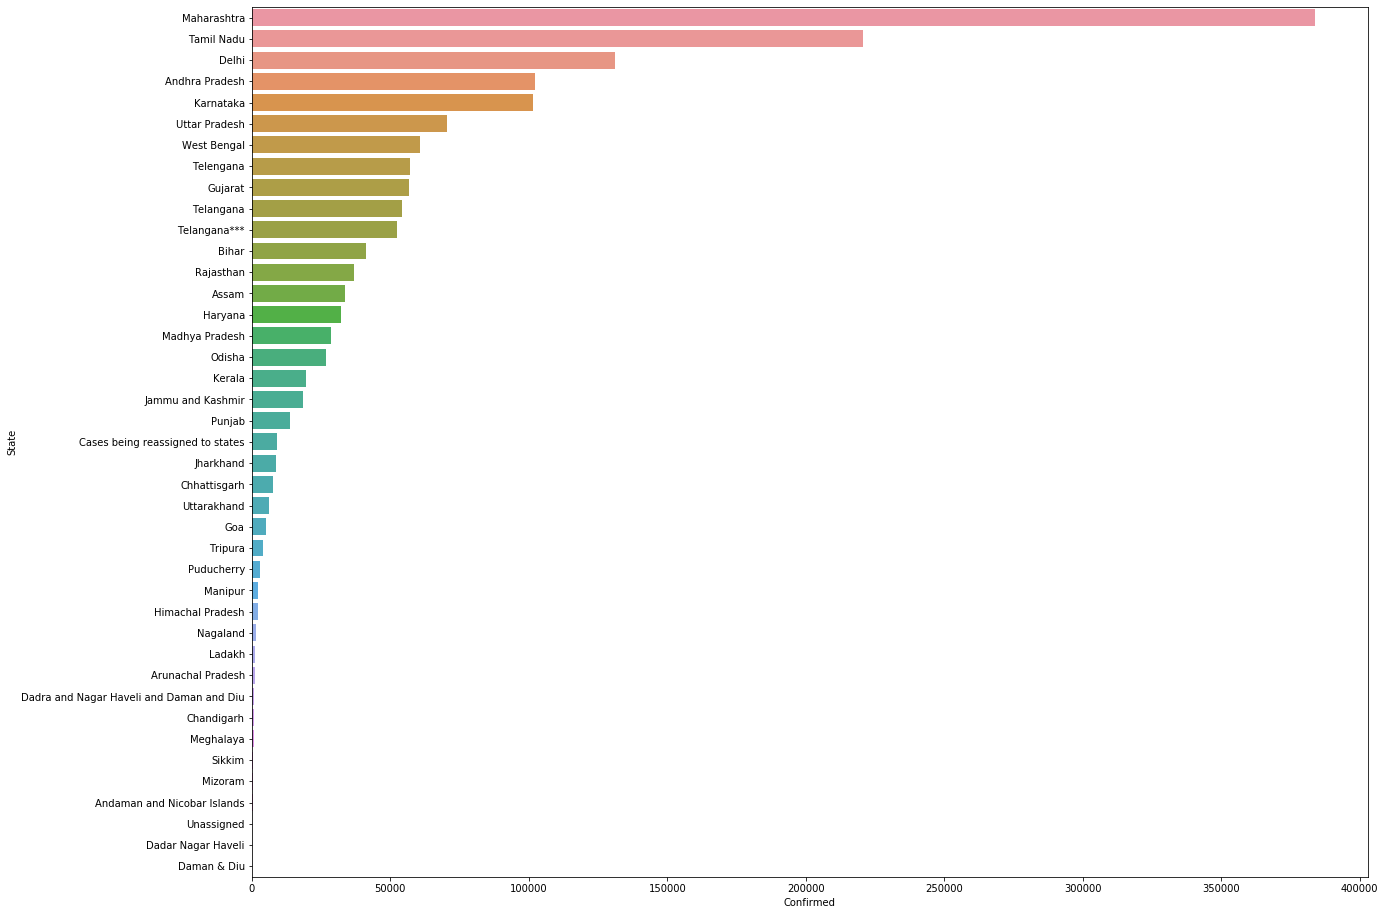

In [92]:
plt.figure(figsize=(20,16))
sns.barplot(data2['Confirmed'], data2['State'])
plt.show()


In [93]:

Top_12_records = data2.head(12)
Top_12_records["Mortality"]=(Top_12_records["Deaths"]/Top_12_records["Confirmed"])*100
Top_12_records["Recovery"]=(Top_12_records["Cured"]/Top_12_records["Confirmed"])*100


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
Top_12_records.style.background_gradient(cmap='Dark2_r')

,State,Cured,Deaths,Confirmed,Mortality,Recovery
0,Maharashtra,221944,13883,383723,3.617974,57.839640
1,Tamil Nadu,162249,3571,220716,1.617916,73.510303
2,Delhi,116372,3853,131219,2.936313,88.685328
3,Andhra Pradesh,49558,1090,102349,1.064984,48.420600
4,Karnataka,37685,1953,101465,1.924802,37.140886
5,Uttar Pradesh,42833,1456,70493,2.065453,60.762061
6,West Bengal,39917,1411,60830,2.319579,65.620582
7,Telengana,42909,480,57142,0.840013,75.091876
8,Gujarat,41380,2348,56874,4.128424,72.757323
9,Telangana,41332,463,54059,0.856472,76.457204


In [95]:
fig = px.pie(Top_12_records, values='Confirmed', names=Top_12_records['State'], title="Major states affected")
fig.show()

In [96]:
fig = px.pie(Top_12_records, values='Mortality', names=Top_12_records['State'], title="Mortality")
fig.show()